In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from IPython.display import clear_output
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

sns.set()

In [ ]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
# Load data
!gdown --id 1wRXRg5nX-Zc16nGq7gwa5wzRZYfHb2jx
!gdown --id 1nK6mf5onD0bEUyJ9avNwerX9xKXVSmZS
!gdown --id 1sj6dbF-POt2MpBS7T7o00pOMTKpd99va

clear_output()

df_main = pd.read_csv('india-districts-census-2011.csv')

In [ ]:
df_main.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

In [ ]:
df_main.describe()

District code    Population          Male        Female      Literate  \
count     640.000000  6.400000e+02  6.400000e+02  6.400000e+02  6.400000e+02   
mean      320.500000  1.891961e+06  9.738598e+05  9.181011e+05  1.193186e+06   
std       184.896367  1.544380e+06  8.007785e+05  7.449864e+05  1.068583e+06   
min         1.000000  8.004000e+03  4.414000e+03  3.590000e+03  4.436000e+03   
25%       160.750000  8.178610e+05  4.171682e+05  4.017458e+05  4.825982e+05   
50%       320.500000  1.557367e+06  7.986815e+05  7.589200e+05  9.573465e+05   
75%       480.250000  2.583551e+06  1.338604e+06  1.264277e+06  1.602260e+06   
max       640.000000  1.106015e+07  5.865078e+06  5.195070e+06  8.227161e+06   

       Male_Literate  Female_Literate            SC       Male_SC  \
count   6.400000e+02     6.400000e+02  6.400000e+02  6.400000e+02   
mean    6.793182e+05     5.138675e+05  3.146537e+05  1.617739e+05   
std     5.924144e+05     4.801816e+05  3.129818e+05  1.611216e+05   
min     2.614000e+03     1.822000e+03  0.000000e+00  0.000000e+00   
25%     2.764365e+05     2.008920e+05  8.320850e+04  4.230700e+04   
50%     5.483525e+05     4.038590e+05  2.460160e+05  1.255485e+05   
75%     9.188582e+05     6.641550e+05  4.477078e+05  2.284602e+05   
max     4.591396e+06     3.635765e+06  2.464032e+06  1.266504e+06   

          Female_SC            ST        Male_ST      Female_ST       Workers  \
count  6.400000e+02  6.400000e+02     640.000000     640.000000  6.400000e+02   
mean   1.528798e+05  1.633527e+05   82105.023438   81247.657812  7.529514e+05   
std    1.520336e+05  2.503501e+05  125298.757452  125090.882244  6.071622e+05   
min    0.000000e+00  0.000000e+00       0.000000       0.000000  3.555000e+03   
25%    4.267175e+04  7.312000e+03    3820.500000    3469.000000  3.284688e+05   
50%    1.178550e+05  6.109500e+04   31178.000000   30642.000000  6.223410e+05   
75%    2.140502e+05  2.195518e+05  111340.750000  108593.750000  1.036544e+06   
max    1.197528e+06  1.580850e+06  793305.000000  787545.000000  4.492767e+06   

       Male_Workers  Female_Workers  Main_Workers  Marginal_Workers  \
count  6.400000e+02    6.400000e+02  6.400000e+02        640.000000   
mean   5.186561e+05    2.342953e+05  5.665087e+05     186442.651562   
std    4.412388e+05    1.913541e+05  5.158527e+05     152665.333107   
min    2.228000e+03    1.327000e+03  2.525000e+03       1030.000000   
25%    2.294168e+05    9.420350e+04  2.318405e+05      80667.250000   
50%    4.288515e+05    1.929265e+05  4.455135e+05     147250.000000   
75%    6.991510e+05    3.163658e+05  7.448105e+05     258239.500000   
max    3.363123e+06    1.239177e+06  3.930511e+06     998611.000000   

        Non_Workers  Cultivator_Workers  Agricultural_Workers  \
count  6.400000e+02        6.400000e+02          6.400000e+02   
mean   1.139010e+06        1.856387e+05          2.255513e+05   
std    9.645541e+05        1.514895e+05          2.216222e+05   
min    4.449000e+03        0.000000e+00          0.000000e+00   
25%    4.744058e+05        7.491025e+04          5.284175e+04   
50%    8.874705e+05        1.501250e+05          1.645300e+05   
75%    1.569803e+06        2.553015e+05          3.258982e+05   
max    6.567381e+06        1.013050e+06          1.227956e+06   

       Household_Workers  Other_Workers        Hindus       Muslims  \
count         640.000000   6.400000e+02  6.400000e+02  6.400000e+02   
mean        28653.387500   3.131379e+05  1.509777e+06  2.691331e+05   
std         38513.020711   3.985180e+05  1.279535e+06  4.201270e+05   
min            68.000000   2.091000e+03  8.730000e+02  7.400000e+01   
25%          8563.500000   1.033562e+05  5.670698e+05  2.623725e+04   
50%         16586.500000   1.992565e+05  1.291930e+06  1.176915e+05   
75%         35126.250000   3.858475e+05  2.116407e+06  3.515840e+05   
max        466007.000000   3.944496e+06  8.716055e+06  4.707573e+06   

         Christians         Sikhs      Buddhists          Jains  \
c

In [ ]:
df = df_main[['District code','State name','District name','Population','Male','Female',
        'Literate', 'Male_Literate', 'Female_Literate','Workers','Male_Workers',
        'Female_Workers','Main_Workers', 'Marginal_Workers','Non_Workers',
        'Cultivator_Workers','Agricultural_Workers','Household_Workers', 'Other_Workers',
        'Households_with_Internet','Households_with_Computer','Rural_Households',
        'Urban_Households', 'Households','Below_Primary_Education','Primary_Education',
        'Middle_Education', 'Secondary_Education','Higher_Education','Graduate_Education',
        'Other_Education','Literate_Education', 'Illiterate_Education', 'Total_Education',
        'Age_Group_0_29', 'Age_Group_30_49','Age_Group_50','Age not stated',
        'Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car',
        'Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_90000_150000',
        'Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000',
        'Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000',
        'Power_Parity_Above_Rs_545000', 'Total_Power_Parity']]

In [ ]:
df.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'Workers',
       'Male_Workers', 'Female_Workers', 'Main_Workers', 'Marginal_Workers',
       'Non_Workers', 'Cultivator_Workers', 'Agricultural_Workers',
       'Household_Workers', 'Other_Workers', 'Households_with_Internet',
       'Households_with_Computer', 'Rural_Households', 'Urban_Households',
       'Households', 'Below_Primary_Education', 'Primary_Education',
       'Middle_Education', 'Secondary_Education', 'Higher_Education',
       'Graduate_Education', 'Other_Education', 'Literate_Education',
       'Illiterate_Education', 'Total_Education', 'Age_Group_0_29',
       'Age_Group_30_49', 'Age_Group_50', 'Age not stated',
       'Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car',
       'Power_Parity_Less_than_Rs_45000', 'Power_Parity_Rs_90000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_24

In [ ]:
df.isnull().sum()

District code                                                                0
State name                                                                   0
District name                                                                0
Population                                                                   0
Male                                                                         0
Female                                                                       0
Literate                                                                     0
Male_Literate                                                                0
Female_Literate                                                              0
Workers                                                                      0
Male_Workers                                                                 0
Female_Workers                                                               0
Main_Workers                                        

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 47 columns):
 #   Column                                                                     Non-Null Count  Dtype 
---  ------                                                                     --------------  ----- 
 0   District code                                                              640 non-null    int64 
 1   State name                                                                 640 non-null    object
 2   District name                                                              640 non-null    object
 3   Population                                                                 640 non-null    int64 
 4   Male                                                                       640 non-null    int64 
 5   Female                                                                     640 non-null    int64 
 6   Literate                                                          

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



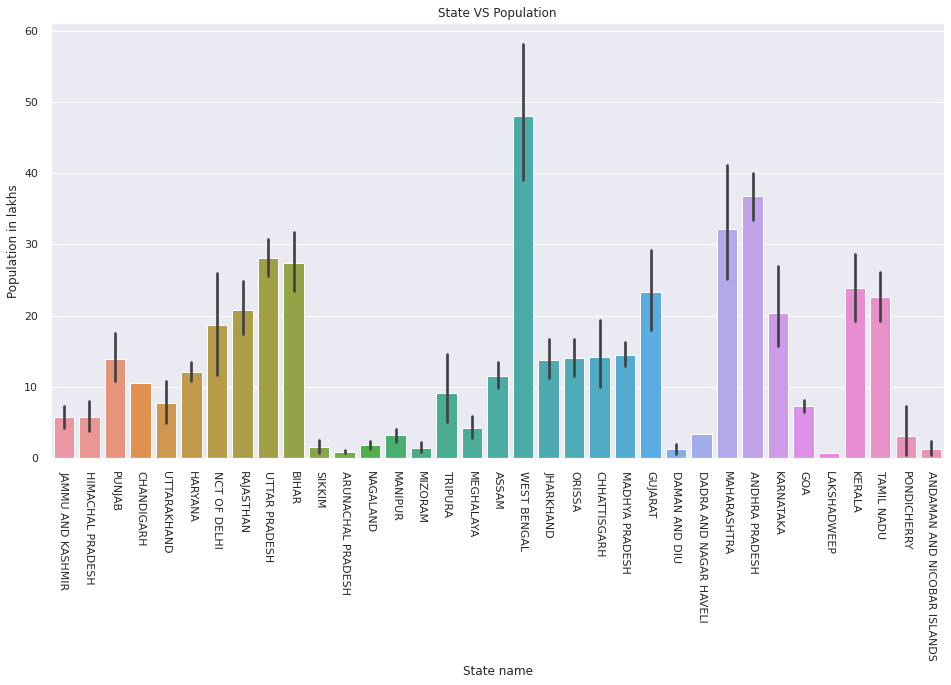

In [ ]:
# creating the bar plot
plt.figure(figsize=(16,8))
sns.barplot(df['State name'], df['Population']/100000)
plt.xticks(rotation=-90)
plt.title("State VS Population")
plt.ylabel('Population in lakhs')
plt.show()

In [ ]:
df.groupby(['State name',
            'District name','Population']).agg([sum])#.sort_values(by=max, ascending=False)#.iloc[:,:0]

District code  \
                                                                              sum   
State name                  District name                Population                 
ANDAMAN AND NICOBAR ISLANDS Nicobars                     36842                638   
                            North  AND Middle Andaman    105597               639   
                            South Andaman                238142               640   
ANDHRA PRADESH              Adilabad                     2741239              532   
                            Anantapur                    4081148              553   
                            Chittoor                     4174064              554   
                            East Godavari                5154296              545   
                            Guntur                       4887813              548   
                            Hyderabad                    3943323              536   
                            Karimnagar                   3776269              534   
                            Khammam                      2797370              541   
                            Krishna                      4517398              547   
                            Kurnool                      4053463              552   
                            Mahbubnagar                  4053028              538   
                            Medak                        3033288              535   
                            Nalgonda                     3488809              539   
                            Nizamabad                    2551335              533   
                            Prakasam                     3397448              549   
                            Rangareddy                   5296741              537   
                            Sri Potti Sriramulu Nellore  2963557              550   
                            Srikakulam                   2703114              542   
                            Visakhapatnam                4290589              544   
                            Vizianagaram                 2344474              543   
                            Warangal                     3512576              540   
                            West Godavari                3936966              546   
                            Y.S.R.                       2882469              551   
ARUNACHAL PRADESH           Anjaw                        21167                260   
                            Changlang                    148226               253   
                            Dibang Valley                8004                 257   
                            East Kameng                  78690                247   
                            East Siang                   99214                251   
                            Kurung Kumey                 92076                256   
                            Lohit                        145726               259   
                            Lower Dibang Valley          54080                258   
                            Lower Subansiri              83030                255   
                            Papum Pare                   176573               248   
                            Tawang                       49977                245   
                            Tirap                        111975               254   
                            Upper Siang                  35320                252   
                            Upper Subansiri              83448                249   
                            West Kameng                  83947                246   
                            West Siang                   112274               250   
ASSAM                       Baksa                        950075               324   
                            Barpeta                      1693622              303   
                            Bongaigaon                   738804          

In [ ]:
state_pop = df.groupby(['State name']).Population.agg([sum])
state_pop.sort_values(by=['sum'],ascending=False).head(10)

sum
State name               
UTTAR PRADESH   199812341
MAHARASHTRA     112374333
BIHAR           104099452
WEST BENGAL      91276115
ANDHRA PRADESH   84580777
MADHYA PRADESH   72626809
TAMIL NADU       72147030
RAJASTHAN        68548437
KARNATAKA        61095297
GUJARAT          60439692

In [ ]:
# the above list has the most population on India so we will target these states for segmentation 


In [ ]:
df.head()

District code         State name District name  Population    Male  Female  \
0              1  JAMMU AND KASHMIR       Kupwara      870354  474190  396164   
1              2  JAMMU AND KASHMIR        Badgam      753745  398041  355704   
2              3  JAMMU AND KASHMIR   Leh(Ladakh)      133487   78971   54516   
3              4  JAMMU AND KASHMIR        Kargil      140802   77785   63017   
4              5  JAMMU AND KASHMIR         Punch      476835  251899  224936   

   Literate  Male_Literate  Female_Literate  Workers  Male_Workers  \
0    439654         282823           156831   229064        190899   
1    335649         207741           127908   214866        162578   
2     93770          62834            30936    75079         53265   
3     86236          56301            29935    51873         39839   
4    261724         163333            98391   161393        117677   

   Female_Workers  Main_Workers  Marginal_Workers  Non_Workers  \
0           38165        123837            105227       641290   
1           52288        132003             82863       538879   
2           21814         57125             17954        58408   
3           12034         28941             22932        88929   
4           43716         73247             88146       315442   

   Cultivator_Workers  Agricultural_Workers  Household_Workers  Other_Workers  \
0               34680                 56759               7946         129679   
1               55299                 36630              29102          93835   
2               20869                  1645               1020          51545   
3                8266                  3763               1222          38622   
4               54264                 31583               3930          71616   

   Households_with_Internet  Households_with_Computer  Rural_Households  \
0                       762                      5256            158438   
1                      1999                      5892            160649   
2                       574                      2150             36920   
3                       235                      1005             40370   
4                       346                      3342            132139   

   Urban_Households  Households  Below_Primary_Education  Primary_Education  \
0             23226      181664                    60616             101642   
1             27190      187839                    68336              80862   
2             17474       54394                    10452              15181   
3              7774       48144                    12732              19083   
4             15269      147408                    55762              72024   

   Middle_Education  Secondary_Education  Higher_Education  \
0             99947                74948             39709   
1             83141                66459             41367   
2             17900                16265              8923   
3             20874                16938              9826   
4             69219                46062             29517   

   Graduate_Education  Other_Education  Literate_Education  \
0               21751             6402              405015   
1               27950             6857              374972   
2                6197              575               75493   
3                3077              408               82938   
4               13962             1884              288430   

   Illiterate_Education  Total_Education  Age_Group_0_29  Age_Group_30_49  \
0                289765           694780          600759           178435   
1                342646           717618          503223           160933   
2                 32637           108130           70703            41515   
3                 39854           122792           87532            35561   
4                164044           452474          304979           109818   

   Age_Group_50  Age not stated  \
0         89679            1481   
1     

In [ ]:
df['rich'] = df['Power_Parity_Rs_150000_240000'] + df['Power_Parity_Rs_240000_330000'] + df['Power_Parity_Rs_330000_425000'] + df['Power_Parity_Rs_425000_545000'] + df['Power_Parity_Above_Rs_545000'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
Uttar_Pradesh = df[df['State name'] == "UTTAR PRADESH"]
Maharashtra = df[df['State name'] == "MAHARASHTRA"]
Bihar = df[df['State name'] == "BIHAR"]
West_Bengal = df[df['State name'] == "WEST BENGAL"]
Andra_Pradesh = df[df['State name'] == "ANDHRA PRADESH"]
Madhya_Pradesh = df[df['State name'] == "MADHYA PRADESH"]
Tamil_Nadu = df[df['State name'] == "TAMIL NADU"]
Rajasthan = df[df['State name'] == "RAJASTHAN"]
Karnataka = df[df['State name'] == "KARNATAKA"]
Gujarat = df[df['State name'] == "GUJARAT"]

In [ ]:
def Explore_districts(state):
    plt.figure(figsize=(16,8))
    ax = sns.barplot(x=state['District name'] ,
                     y=state['Population']/100000, 
                     data= Uttar_Pradesh)
    plt.xticks(rotation=-90)
    plt.title("District name VS Population")
    plt.ylabel('Population in lakhs')
    plt.show()
    
    plt.figure(figsize=(16,8))
    fig = px.histogram(state,
                       x = "District name",
                       y = "Literate",
                       title = "Literate Population per State",
                       color_discrete_sequence=['seagreen'])

    fig.update_layout(bargap = 0.2)
    fig.show()
    
    plt.figure(figsize=(16,8))
    fig = px.histogram(state,
                           x="District name", 
                           y = "Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car", 
                           title='House eminities Vs Districts',
                      color_discrete_sequence=['seagreen'])
    fig.update_layout(bargap=0.1)
    fig.show()
    
    plt.figure(figsize=(16,8))
    fig = px.histogram(state,
                           x="District name", 
                           y = "Households_with_Internet", 
                           title='Internet Vs Districts',
                      color_discrete_sequence=['seagreen'])
    fig.update_layout(bargap=0.1)
    fig.show()

# Plot Explore_districts of different States

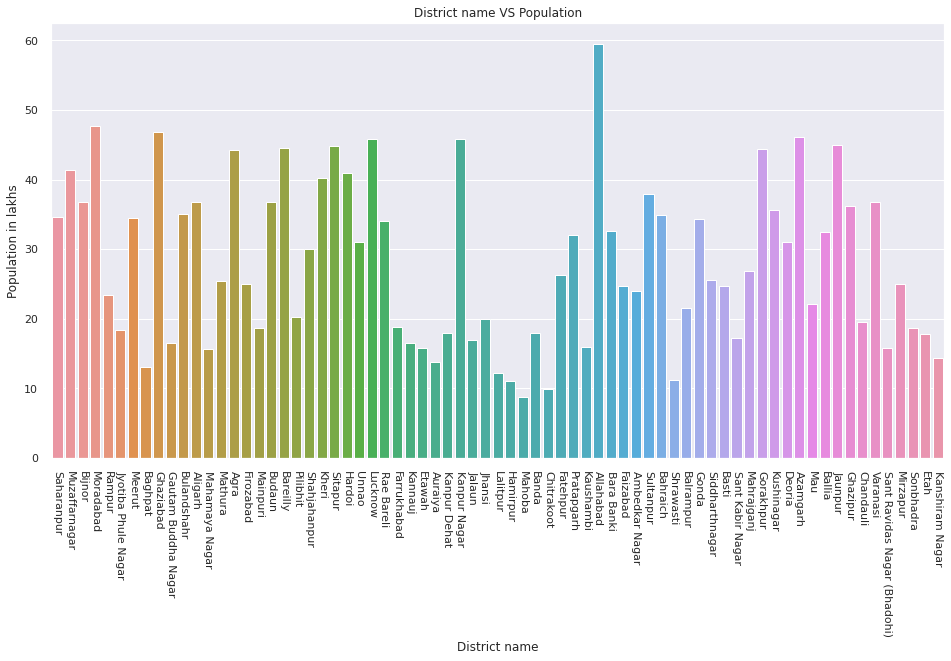

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Uttar_Pradesh)

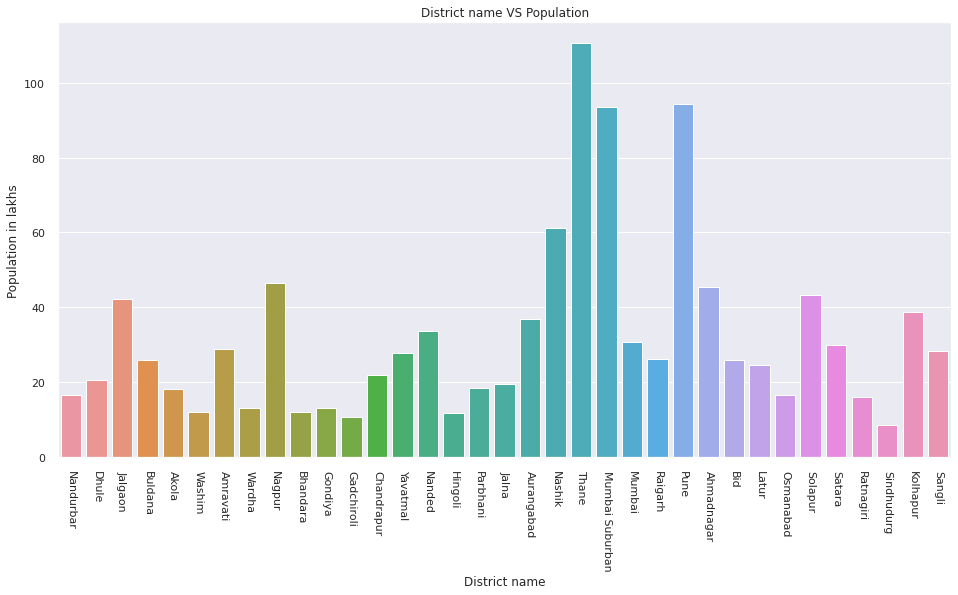

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Maharashtra)

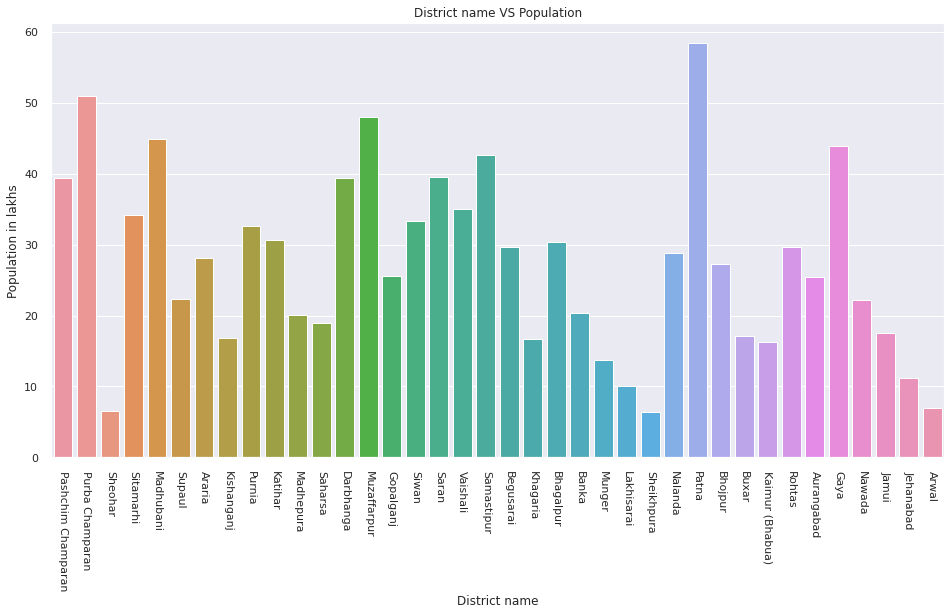

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Bihar)

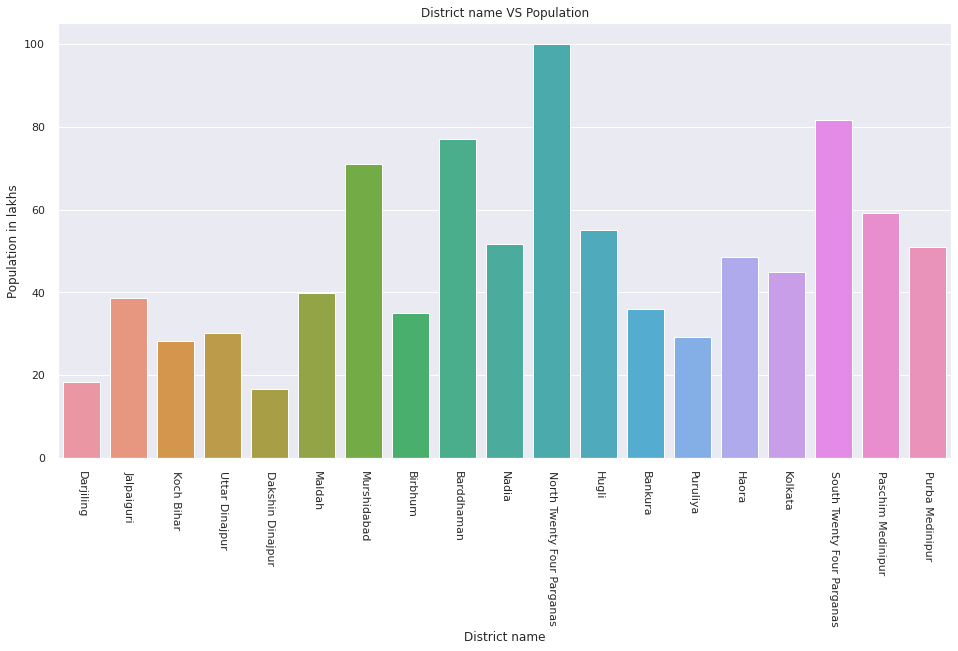

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(West_Bengal)

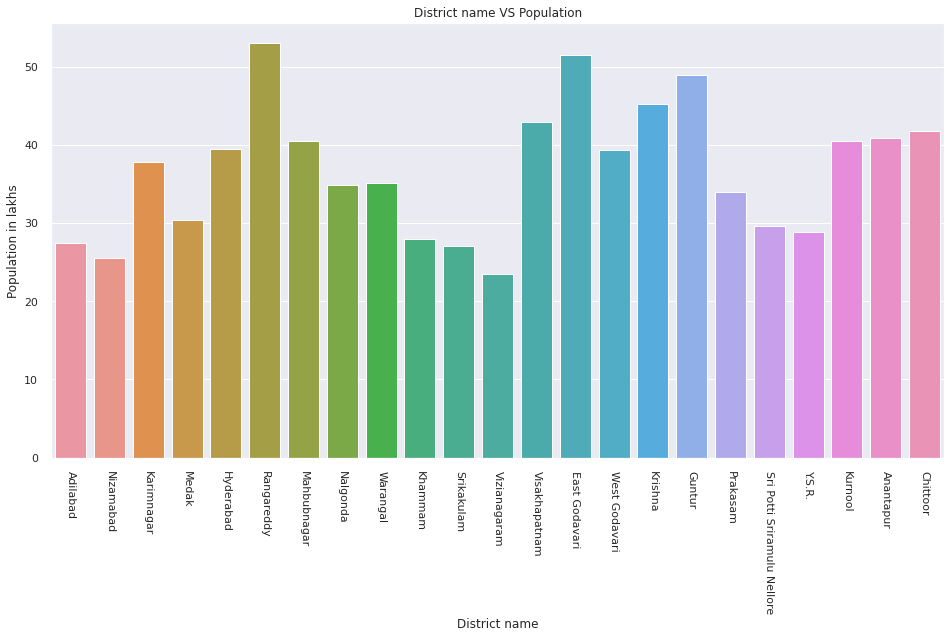

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Andra_Pradesh)

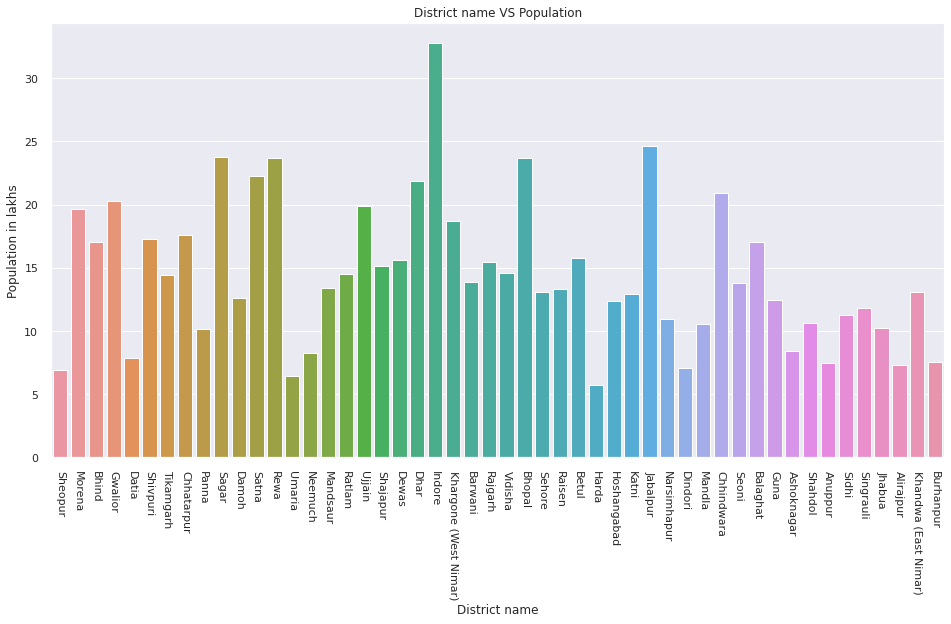

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Madhya_Pradesh)

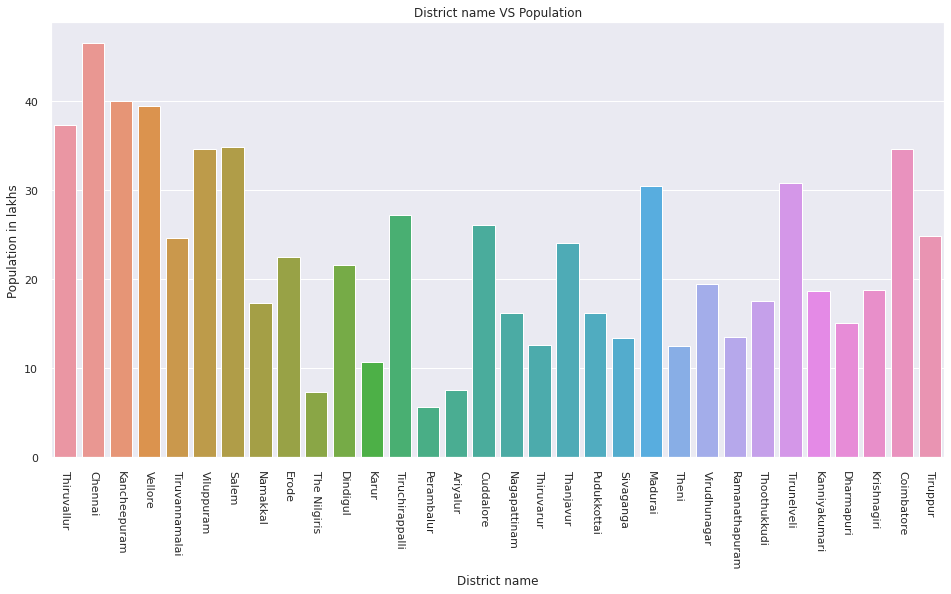

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Tamil_Nadu)

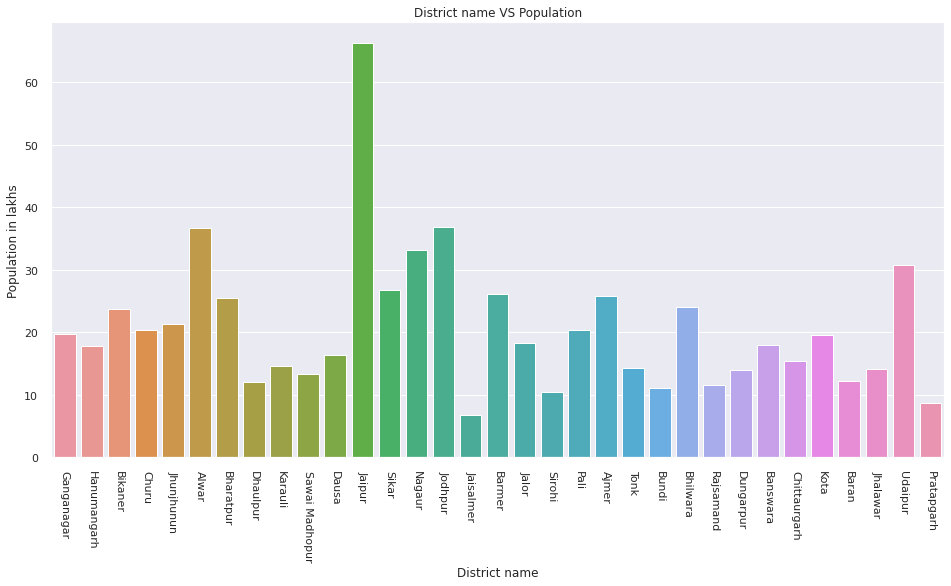

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Rajasthan)

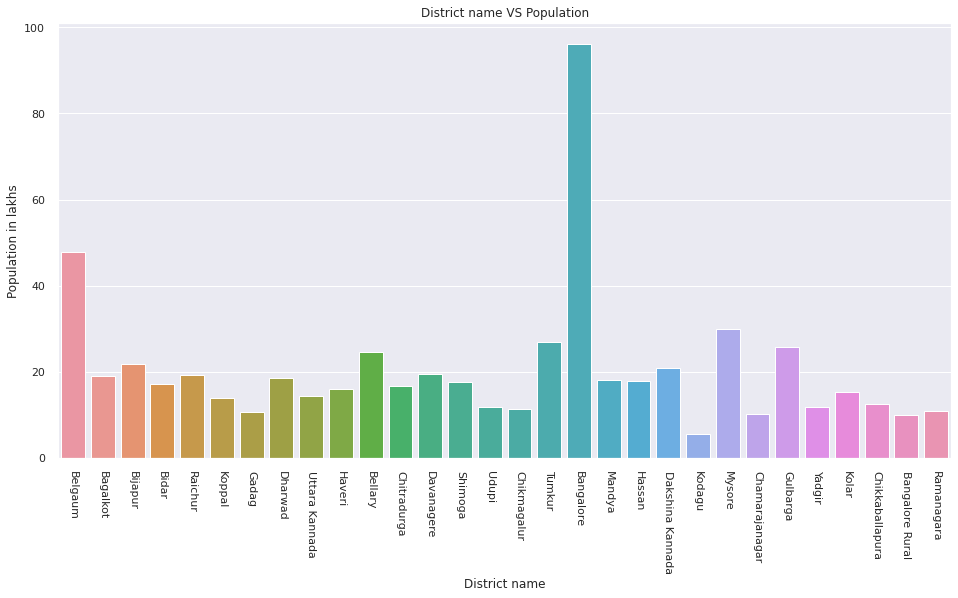

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Karnataka)

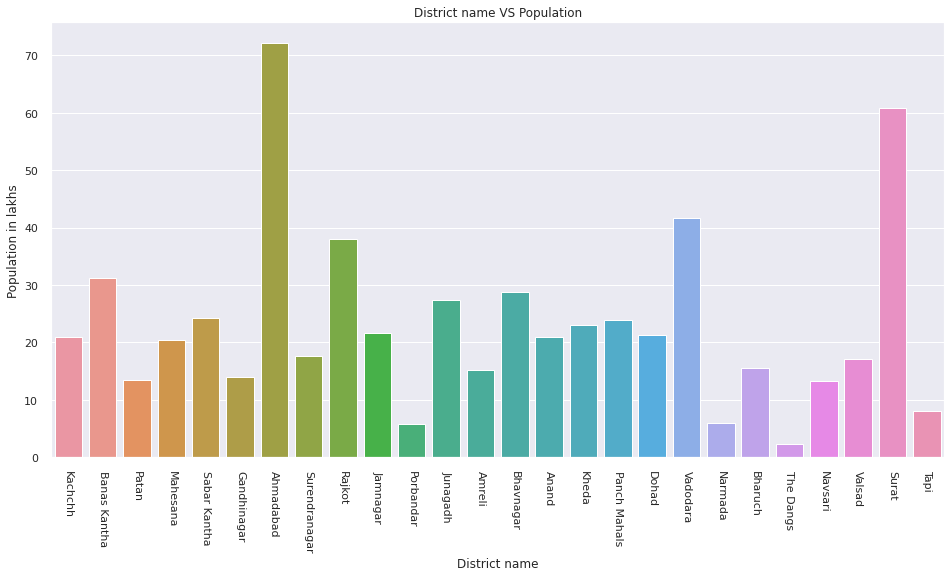

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

In [ ]:
Explore_districts(Gujarat)

# Target States

In [ ]:
target_States = pd.concat([Uttar_Pradesh, 
                             Maharashtra,Bihar,West_Bengal,Andra_Pradesh,
                             Madhya_Pradesh,Tamil_Nadu,Rajasthan,
                             Karnataka,Gujarat], axis=0)

In [ ]:
fig = px.treemap(target_States, 
                 path=['State name','District name'], 
                 values='Population',
                 color='Households_with_Internet', 
                 color_continuous_scale=['white', 'green'],
                title = 'State with most number of internet connections')
fig.update_layout(bargap=1,autosize=False,
    width=800,
    height=800,)
fig.show()

Districts with most number of internet connections are Mumbai Suburban, Pune, Thane, Bangalore, Chennai

In [ ]:
fig = px.treemap(target_States, 
                 path=['State name','District name'], 
                 values='Population',
                 color='Literate', 
                 color_continuous_scale=['white', 'green'],
                title = 'States with most Literate population')
fig.update_layout(bargap=1,autosize=False,
    width=800,
    height=800,)
fig.show()

Districts with most number of Literate population are North twenty four parganas, Mumbai Suburban, Pune, Thane, Bangalore.

In [ ]:
fig = px.treemap(target_States, 
                 path=['State name','District name'], 
                 values='Population',
                 color='rich', 
                 color_continuous_scale=['white', 'green'],
                title = 'Richer states')
fig.update_layout(bargap=1,autosize=False,
    width=800,
    height=800,)
fig.show()

Districts with richer population are Mumbai Suburban, Pune, Thane, Bangalore, chennai

### Out of all the parameters above the best areas to target are Mumbai Suburban, Pune, Thane, Bangalore, Chennai

In [ ]:
target_States.drop(['District code', 'Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_90000_150000','Male_Workers',
                      'Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Female_Workers',
                      'Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000','rich',
                      'Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate',
                      'Female_Literate','Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers',
                      'Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education',
                      'Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education',
                      'Literate_Education','Illiterate_Education','Total_Education', 'Age not stated'], axis=1, inplace= True)

target_States.rename(columns = {'Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car':'Households_with_assets',}, inplace = True)
target_States.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 357 entries, 131 to 492
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State name                357 non-null    object
 1   District name             357 non-null    object
 2   Population                357 non-null    int64 
 3   Male                      357 non-null    int64 
 4   Female                    357 non-null    int64 
 5   Literate                  357 non-null    int64 
 6   Households_with_Internet  357 non-null    int64 
 7   Households_with_Computer  357 non-null    int64 
 8   Rural_Households          357 non-null    int64 
 9   Urban_Households          357 non-null    int64 
 10  Households                357 non-null    int64 
 11  Age_Group_0_29            357 non-null    int64 
 12  Age_Group_30_49           357 non-null    int64 
 13  Age_Group_50              357 non-null    int64 
 14  Households_with_assets  

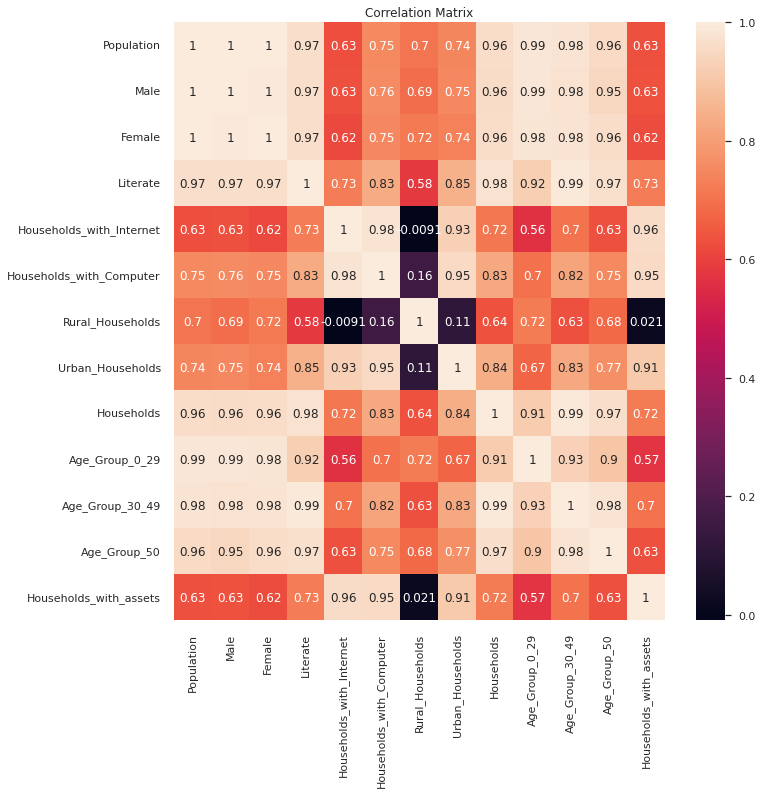

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(target_States.corr(), annot=True)
plt.title('Correlation Matrix');

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
LB = LabelEncoder()
target_States['State name'] = LB.fit_transform(target_States['State name'])
target_States['District name'] = LB.fit_transform(target_States['District name'])

In [ ]:
advance_data = target_States
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(advance_data)
segmentation_std = pd.DataFrame(segmentation_std,columns=advance_data.columns)

Text(0.5, 1.0, 'Correlation Matrix')

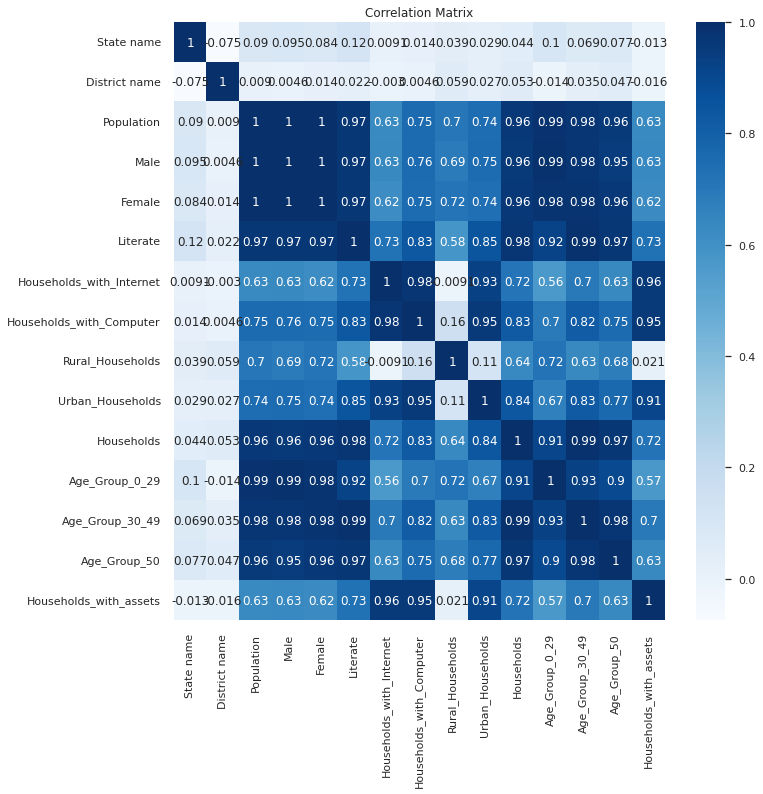

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [ ]:
segmentation_std= pd.DataFrame(segmentation_std)
print(segmentation_std.max())

State name                   1.531122
District name                1.727458
Population                   5.269671
Male                         5.408542
Female                       5.107640
Literate                     5.713427
Households_with_Internet     9.920506
Households_with_Computer     9.555988
Rural_Households             4.233350
Urban_Households             7.666228
Households                   6.116486
Age_Group_0_29               5.081864
Age_Group_30_49              5.748487
Age_Group_50                 5.716858
Households_with_assets      10.566830
dtype: float64


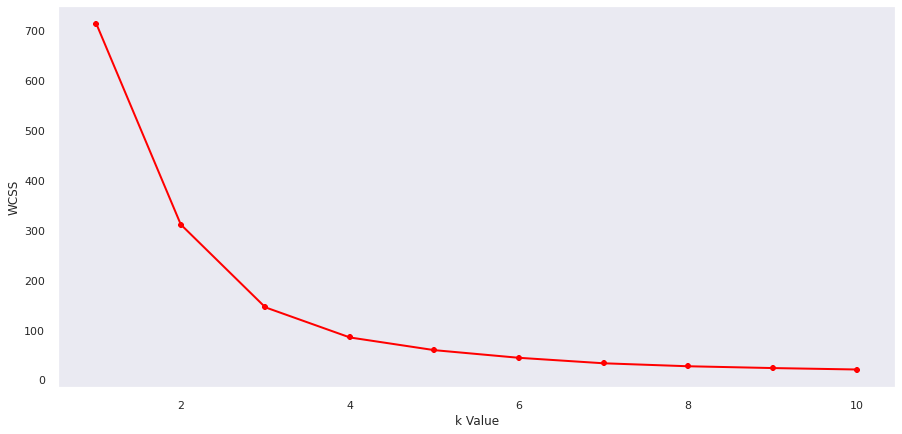

In [ ]:
X1 = segmentation_std.loc[:, ["Population","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[2 2 2 2 0 0 2 0 2 0 2 2 0 0 2 0 0 2 2 0 2 2 2 2 2 2 2 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 2 0 2 2 0 0 2 2 0 0 2 0 0 0 0 2 2 2 2 0 2 2 2 0 2 0 0 0 0 0 0 0 2
 2 0 0 2 0 2 0 0 0 0 2 2 0 0 0 2 1 1 1 2 2 1 2 0 0 0 2 2 0 0 2 2 2 2 0 2 2
 0 0 0 2 0 0 0 2 2 0 2 2 2 2 2 0 2 0 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 2 2 2
 0 2 1 2 1 2 1 2 2 2 2 2 1 1 2 0 0 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 1 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 2 0 0 0 0 0 0 0 0 2
 0 0 0 0 1 0 2 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 1 0]


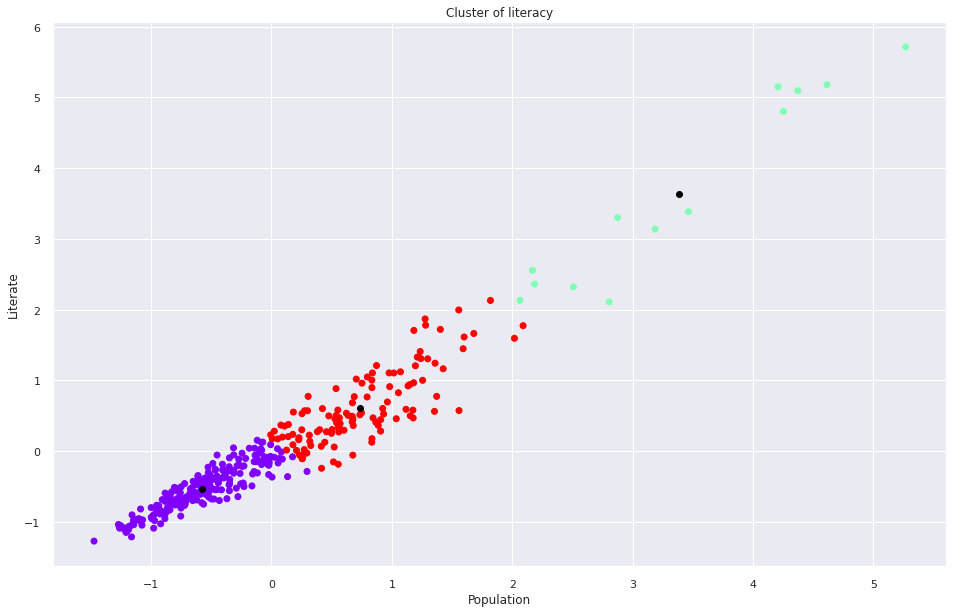

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of literacy')
plt.xlabel('Population')
plt.ylabel('Literate')
plt.show()

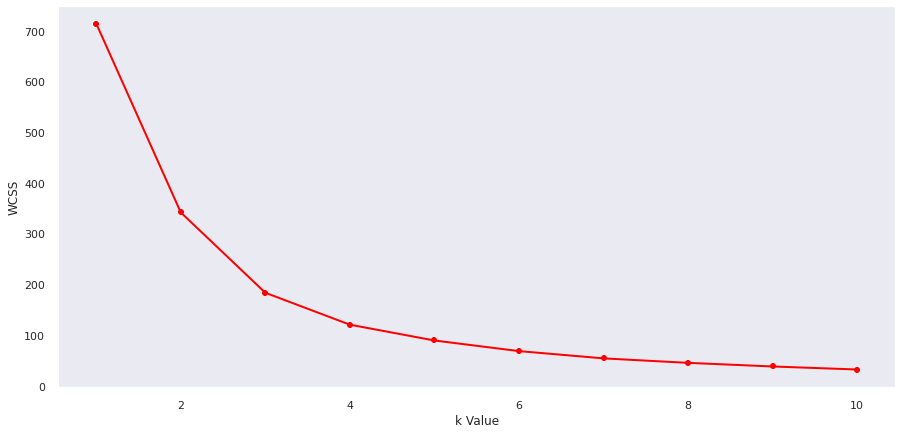

In [ ]:
X1 = segmentation_std.loc[:, ["Households_with_Internet","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 1 1 2 0 1 2 0 0 0 2 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 2 2 2 2 0 0 2 2 2 2 2 0 0 0 0 2 2 0 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0]


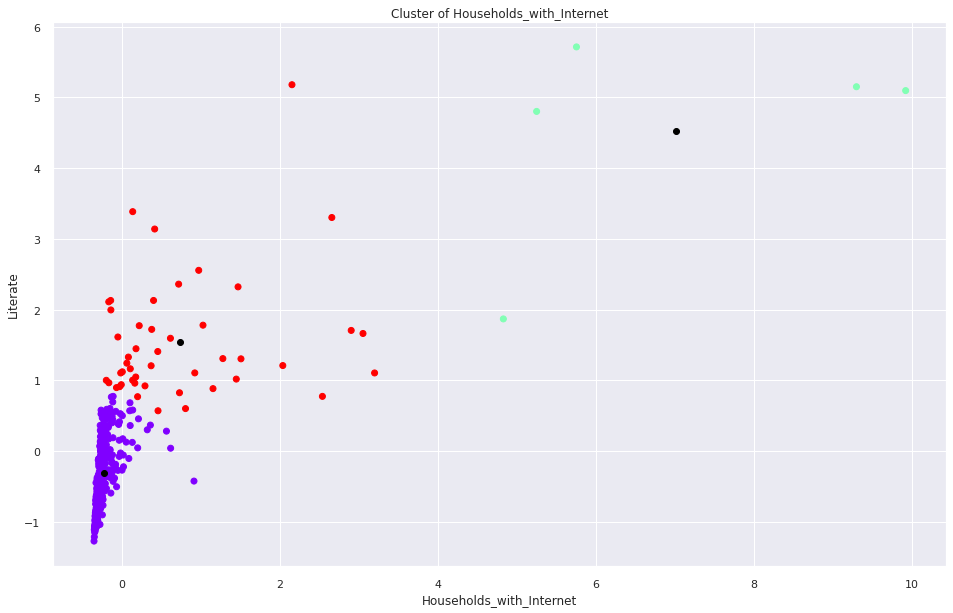

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Households_with_Internet')
plt.xlabel('Households_with_Internet')
plt.ylabel('Literate')
plt.show()

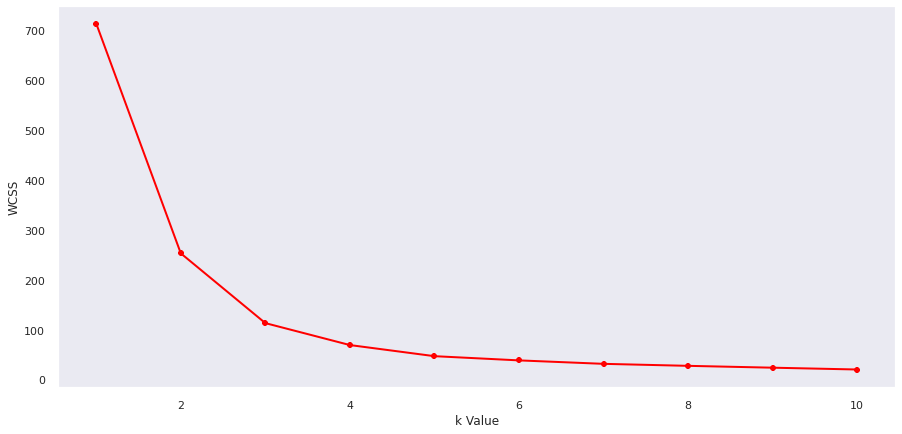

In [ ]:
X1 = segmentation_std.loc[:, ["Urban_Households","Households_with_Computer"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X1)
print(label)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


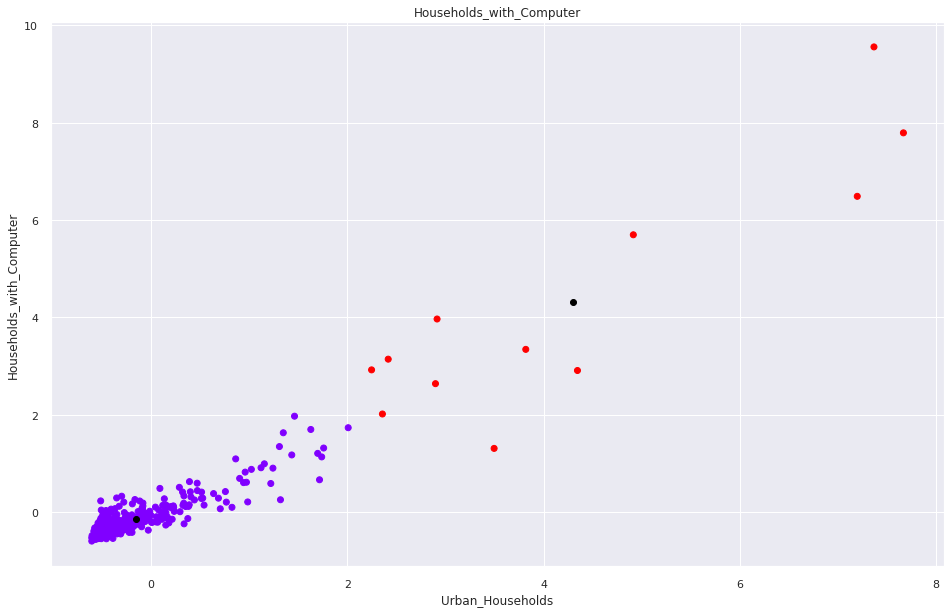

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Households_with_Computer')
plt.xlabel('Urban_Households')
plt.ylabel('Households_with_Computer')
plt.show()

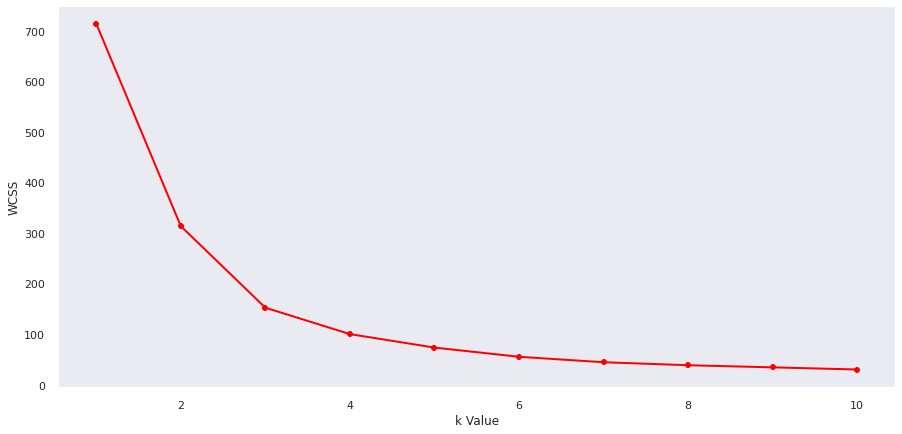

In [ ]:
X1 = segmentation_std.loc[:, ["Age_Group_0_29","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 4)
label = kmeans.fit_predict(X1)
print(label)

[3 0 0 0 3 1 3 1 0 1 3 3 1 3 0 3 1 3 0 1 3 0 0 0 3 0 3 1 1 1 1 1 0 1 1 1 1
 1 1 1 3 3 1 0 3 3 3 0 3 1 1 3 3 3 1 3 0 3 3 0 3 3 0 3 1 0 1 3 1 1 1 1 1 0
 3 1 1 3 1 0 1 1 1 3 3 3 1 1 1 0 0 2 2 3 3 2 0 3 3 1 0 3 1 1 0 3 3 0 1 3 0
 1 3 1 3 3 1 1 3 0 3 3 0 3 0 3 1 3 1 1 1 1 3 0 3 1 1 3 3 0 1 1 1 1 1 0 3 3
 1 0 0 3 2 0 2 0 3 3 0 0 2 0 0 3 3 3 3 0 0 3 3 3 3 3 1 0 0 0 0 0 3 3 3 3 3
 0 1 1 1 1 1 1 1 1 1 3 1 3 3 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 1 3 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 3 3 3 1 1 1 1 1 3 1 1 3 1 1 3 1 1 3 1
 1 1 1 3 1 1 1 3 3 1 1 3 1 3 3 3 1 1 1 1 0 3 3 3 1 3 1 1 1 3 1 1 3 1 1 1 1
 1 1 1 3 1 0 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 3 2 1 1 1 1 3 1 3 1 1 1 1 1 1 3
 1 1 3 1 2 1 0 1 1 3 1 3 1 3 3 1 0 1 1 1 1 1 0 1]


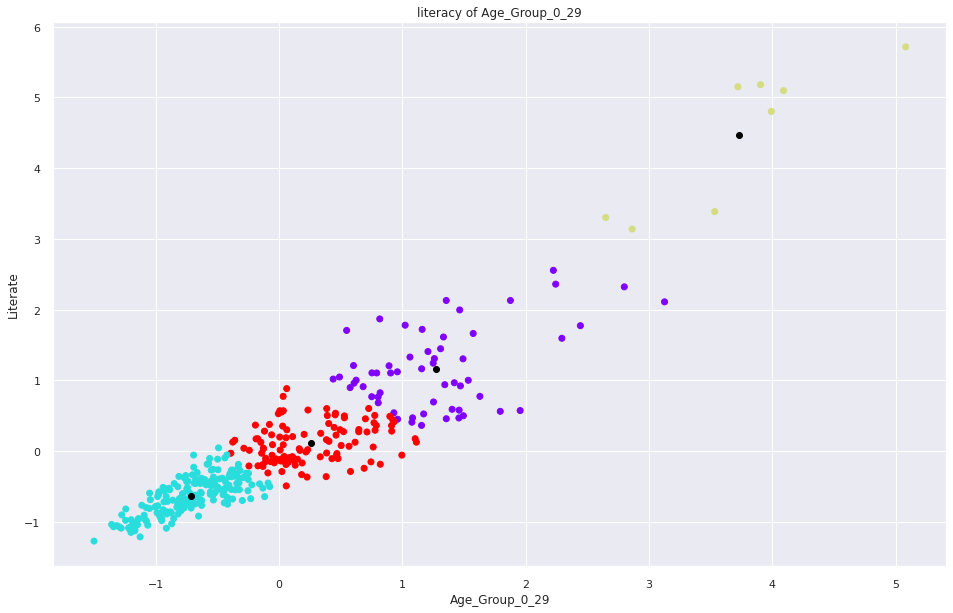

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('literacy of Age_Group_0_29')
plt.xlabel('Age_Group_0_29')
plt.ylabel('Literate')
plt.show()

In [ ]:
target_States.head()

State name  District name  Population     Male   Female  Literate  \
131           8            274     3466382  1834106  1632276   2077108   
132           8            217     4143512  2193434  1950078   2417339   
133           8             59     3682713  1921215  1761498   2135393   
134           8            211     4772006  2503186  2268820   2263848   
135           8            266     2335819  1223889  1111930   1043666   

     Households_with_Internet  Households_with_Computer  Rural_Households  \
131                      9699                     38816            605082   
132                     10077                     56149            673746   
133                      7303                     37341            683875   
134                     11690                     61846            692398   
135                      3847                     25960            396775   

     Urban_Households  Households  Age_Group_0_29  Age_Group_30_49  \
131            284156      889238         2228689           769736   
132            296104      969850         2671757           911621   
133            224648      908523         2404576           786305   
134            355518     1047916         3168270           988486   
135            143217      539992         1576123           491164   

     Age_Group_50  Households_with_assets  
131        433862                   17404  
132        544283                   19878  
133        450186                   11084  
134        525574                   18797  
135        258913                    6956

Text(0.5, 1.0, 'Correlation Matrix')

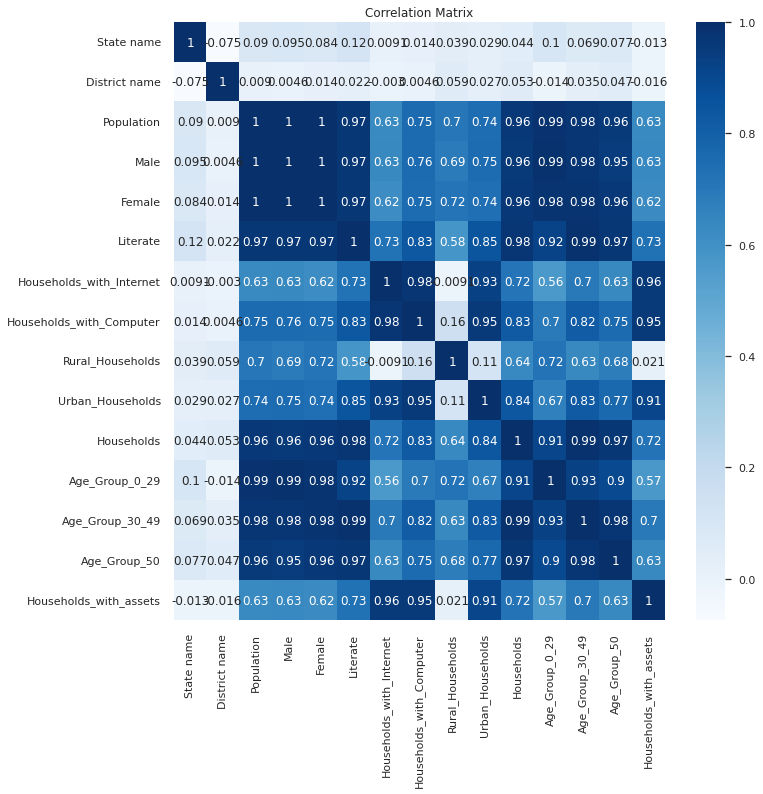

In [ ]:
plt.figure(figsize=(11,11))
sns.heatmap(advance_data.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix')

In [ ]:
x = target_States[['State name', 'District name', 'Population', 'Male', 'Female', 'Literate',	
          'Households_with_Internet', 'Households_with_Computer', 'Rural_Households', 'Urban_Households',
	      'Households',	'Age_Group_0_29', 'Age_Group_30_49',	'Age_Group_50']].values
km = KMeans(n_clusters = 15, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Population'],
    y= segmentation_std['State name'],
    z= segmentation_std['District name'],
    mode='markers',
     marker=dict(color = segmentation_std['labels'], size= 10,
        line=dict(color = segmentation_std['labels'],width= 12),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States as well as District',
    margin=dict(l=0,r=0,b=0,t=0),
    scene = dict(
            xaxis = dict(title  = 'Population'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'District name')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Households'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Households in rural and urban',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Households'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['State name'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'State name'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_0_29'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 0-29 age group',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_30_49'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'households of 30-40 Age groups',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_50'],
    y= segmentation_std['Rural_Households'],
    z= segmentation_std['Urban_Households'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Urban and Rural Households',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'Rural_Households'),
            zaxis = dict(title  = 'Urban_Households')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_0_29'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_0_29'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_30_49'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_30_49'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [ ]:
segmentation_std['labels'] =  labels
trace1 = go.Scatter3d(
    x= segmentation_std['Age_Group_50'],
    y= segmentation_std['State name'],
    z= segmentation_std['Population'],
    mode='markers',
     marker=dict(
        color = segmentation_std['labels'], 
        size= 10,
        line=dict(
            color= segmentation_std['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'population in States',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age_Group_50'),
            yaxis = dict(title  = 'State name'),
            zaxis = dict(title  = 'Population')
        )
)

fig = go.Figure(data = df, layout = layout)
iplot(fig)